<a href="https://colab.research.google.com/github/lungnahahd/Tensorflow_Prac/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

Regression에 필요한 데이터 다운

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# 집 값 예측 데이터를 변수에 가져오기
housing = fetch_california_housing()

# random_state를 사용해서 랜덤한 weight를 고정 사용 가능
# 데이터를 나누어주는 부분
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# scaler를 이용해서 min-max scaling을 자동으로 처리 가능
# 참고로 scaling은 x 데이터에만 진행!(y에는 처리 X)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [5]:
# weight를 고정시켜주는 부분
# 해당 과정은 Creating Model 전에 작성해주기
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
# 간단한 Regression 모델을 생성하는 부분
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

# 모델을 Compile 하기
# 여기서는 Regression 이므로 MSE를 사용 !!
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# 모델 학습 진행!!
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# 학습한 모델을 Evaluate 하기
mse_test = model.evaluate(X_test, y_test)

# 실제 데이터를 가지고 predict 해보기
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4875 - val_loss: 0.4656

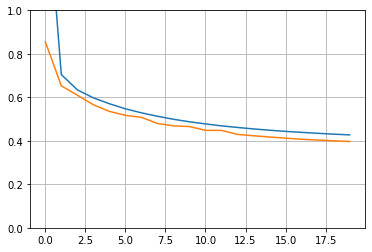

In [8]:
# 이전처럼 학습 결과 history를 가지고 그래프를 그리기
import pandas as pd

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [10]:
y_pred

array([[0.38856643],
       [1.6792021 ],
       [3.1022797 ]], dtype=float32)

In [11]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])